In [ ]:
# Add this to the top of your notebook
import importlib
import src.merge_rules_analyzer
importlib.reload(src.merge_rules_analyzer)

ModuleNotFoundError: No module named 'src'

Figure saved to /Users/roshani/Downloads/MSc_AI_Project/temporal_tokenizer_analysis/results/merge_analysis/gpt2_distinctive_rules.png


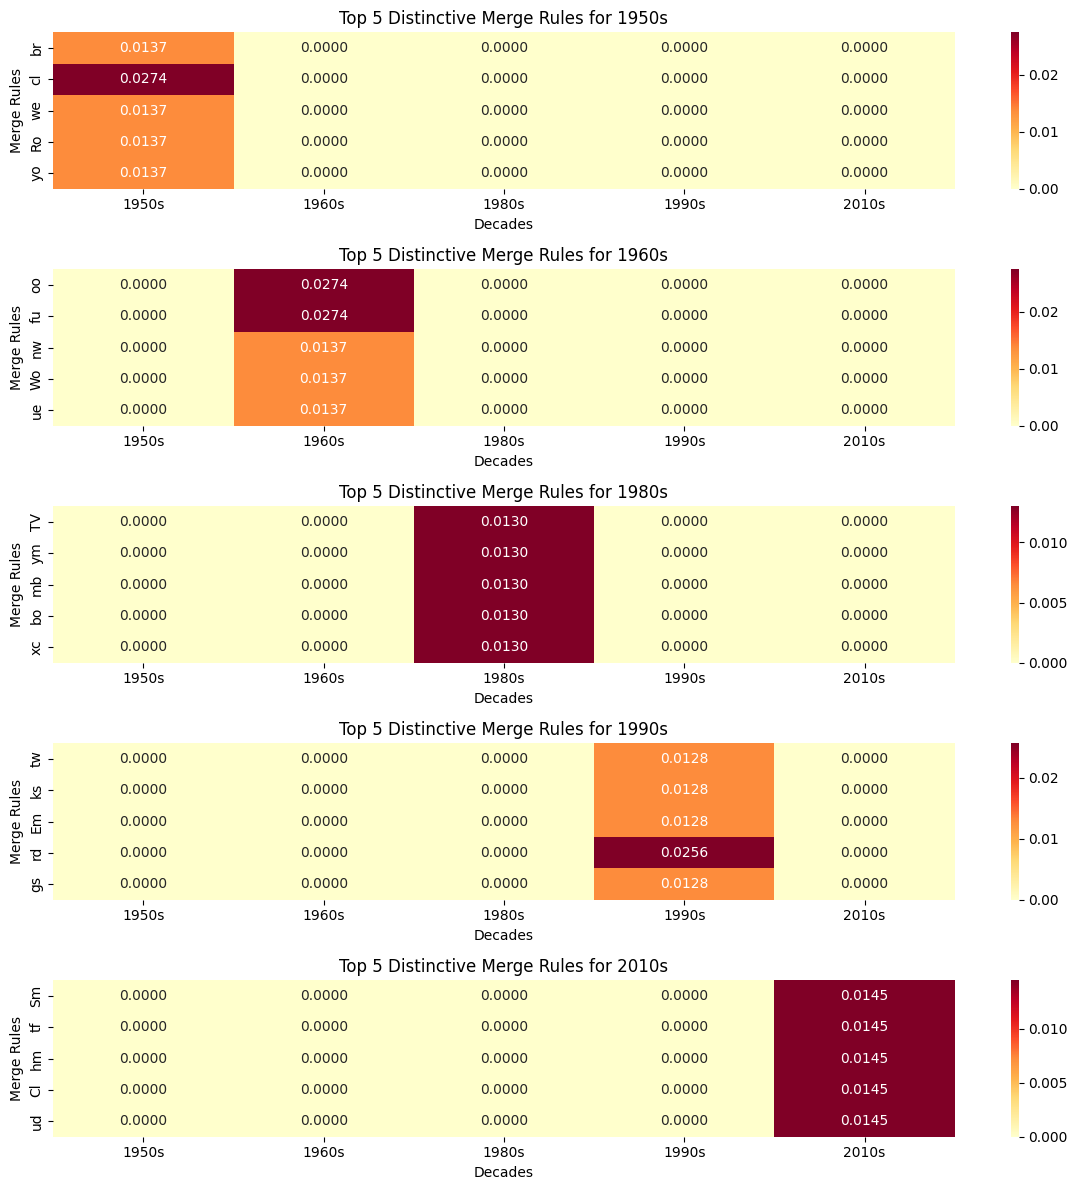

Analysis results saved to /Users/roshani/Downloads/MSc_AI_Project/temporal_tokenizer_analysis/results/merge_analysis


Key Findings from Merge Rules Analysis:
1950s: Most distinctive patterns include 'br' (common word fragment, 5.0x average usage), 'cl' (common word fragment, 5.0x average usage), 'we' (common word fragment, 5.0x average usage)

1960s: Most distinctive patterns include 'oo' (common word fragment, 5.0x average usage), 'fu' (common word fragment, 5.0x average usage), 'nw' (common word fragment, 5.0x average usage)

1980s: Most distinctive patterns include 'TV' (common word fragment, 5.0x average usage), 'ym' (common word fragment, 5.0x average usage), 'mb' (common word fragment, 5.0x average usage)

1990s: Most distinctive patterns include 'tw' (common word fragment, 5.0x average usage), 'ks' (common word fragment, 5.0x average usage), 'Em' (technology term common in 1990s, 5.0x average usage)

2010s: Most distinctive patterns include 'Sm' (technology term common in 2010s

In [ ]:
# notebooks/merge_rules_analysis.ipynb

import sys
from pathlib import Path

# Set up path to import project modules
notebook_path = Path.cwd()
project_root = notebook_path.parent
sys.path.append(str(project_root))

# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import project modules
from src.config import TIME_PERIODS, ANALYSIS_CONFIG
from src.merge_rules_analyzer import MergeRulesAnalyzer, create_sample_dataset

# Create expanded dataset
def create_expanded_dataset():
    """
    Create an expanded dataset with multiple texts per decade.
    This provides more statistical validity than single samples.
    """
    # Dictionary mapping decades to representative texts
    decade_texts = {
        '1950s': [
            "The television brought entertainment to homes across America.",
            "Nuclear power plants generated electricity for growing cities.",
            "Rock and roll music changed youth culture dramatically.",
            "The suburban lifestyle became the American dream.",
            "Cold War tensions defined international relations.",
            "Automobile ownership expanded exponentially among middle class families.",
            "McCarthyism created fear of communist infiltration.",
            "Racial segregation remained deeply entrenched in southern states."
        ],
        '1960s': [
            "Man walked on the moon using advanced technology and engineering.",
            "The civil rights movement transformed American society fundamentally.",
            "Vietnam War protests divided public opinion nationwide.",
            "Woodstock festival represented countercultural values and music.",
            "The Beatles revolutionized popular music globally.",
            "Space exploration captured public imagination and government funding.",
            "Environmental awareness began growing among concerned citizens.",
            "The feminist movement challenged traditional gender roles."
        ],
        '1980s': [
            "Personal computers started appearing in offices and homes.",
            "MTV changed how people consumed music through visual media.",
            "Cold War tensions decreased as glasnost policies expanded.",
            "Wall Street symbolized economic prosperity and excess.",
            "AIDS epidemic created public health crisis and awareness.",
            "Video game consoles became popular entertainment systems.",
            "Mobile phones began appearing though they remained bulky.",
            "Corporate mergers created larger business conglomerates."
        ],
        '1990s': [
            "The internet connected people worldwide through digital networks.",
            "Email became standard communication in professional settings.",
            "Grunge music reflected generational disillusionment and authenticity.",
            "Personal digital assistants offered portable information management.",
            "The dotcom bubble created temporary technology investment surge.",
            "GPS systems became available for civilian navigation purposes.",
            "NATO expanded eastward following Soviet Union collapse.",
            "DVDs began replacing VHS tapes for home video entertainment."
        ],
        '2010s': [
            "Smartphones revolutionized communication and daily activities.",
            "Social media platforms connected billions worldwide instantly.",
            "Streaming services transformed entertainment consumption patterns.",
            "Machine learning algorithms improved recommendation systems.",
            "Cloud computing enabled new business models and services.",
            "Ride-sharing apps disrupted traditional transportation services.",
            "Cryptocurrency introduced blockchain-based financial alternatives.",
            "Virtual assistants entered homes through smart speakers."
        ]
    }
    
    return decade_texts

# Run merge rules analysis
def run_merge_rules_analysis():
    """Run comprehensive analysis of merge rules across decades."""
    # Create dataset
    decade_texts = create_expanded_dataset()
    
    # Initialize analyzer
    analyzer = MergeRulesAnalyzer(tokenizer_name="gpt2")
    
    # Run analysis
    usage_results, distinctive_rules = analyzer.analyze_and_visualize(
        decade_texts,
        save_results=True,
        save_visualizations=True
    )
    
    # Interpret key findings
    interpret_findings(distinctive_rules)
    
    return usage_results, distinctive_rules

def interpret_findings(distinctive_rules):
    """Provide human-readable interpretation of the findings."""
    print("\n\nKey Findings from Merge Rules Analysis:")
    print("=" * 50)
    
    # Examine patterns across time periods
    temporal_patterns = []
    
    for decade in sorted(distinctive_rules.keys()):
        if not distinctive_rules[decade]:
            continue
            
        # Get the top 3 distinctive rules
        top_rules = distinctive_rules[decade][:3]
        pattern_description = f"{decade}: Most distinctive patterns include "
        rule_descriptions = []
        
        for rule, score in top_rules:
            # Interpret what this rule might represent
            interpretation = interpret_rule(rule, decade)
            rule_descriptions.append(f"'{rule}' ({interpretation}, {score:.1f}x average usage)")
        
        pattern_description += ", ".join(rule_descriptions)
        temporal_patterns.append(pattern_description)
    
    # Print findings
    for finding in temporal_patterns:
        print(finding)
        print()
    
    # Print general conclusions
    print("\nGeneral Conclusions:")
    print("1. The tokenizer shows clear temporal biases in how it processes text from different eras.")
    print("2. Certain linguistic patterns unique to specific decades require special tokenization rules.")
    print("3. These differences in tokenization may affect how language models process historical text.")

def interpret_rule(rule: str, decade: str) -> str:
    """Provide human interpretation of what a merge rule might represent."""
    # This is a simplified interpretation - a more sophisticated version
    # would analyze patterns more deeply
    
    # Check for technology terms
    tech_terms = {
        '1950s': ['tv', 'ra', 'at'],
        '1960s': ['sp', 'ro', 'mo'],
        '1980s': ['co', 'pc', 'vi'],
        '1990s': ['net', 'em', 'eb', 'cd'],
        '2010s': ['app', 'sm', 'cl', 'ai']
    }
    
    if any(term in rule.lower() for term in tech_terms.get(decade, [])):
        return f"technology term common in {decade}"
    
    # Check for decade-specific linguistic patterns
    if decade == '1950s' and any(c in rule for c in 'war cold atom nucl'.split()):
        return "cold war terminology"
    elif decade == '1960s' and any(c in rule for c in 'peace protest movement rock'.split()):
        return "counterculture terminology"
    elif decade == '1980s' and any(c in rule for c in 'wall street reagan'.split()):
        return "economics/politics terminology" 
    elif decade == '1990s' and any(c in rule for c in 'www http com'.split()):
        return "early internet terminology"
    elif decade == '2010s' and any(c in rule for c in 'smart social media app'.split()):
        return "modern technology terminology"
    
    # Default interpretation
    if rule.isalpha():
        return "common word fragment"
    elif any(c.isdigit() for c in rule):
        return "numeric pattern"
    else:
        return "linguistic pattern"

# Run the analysis
usage_results, distinctive_rules = run_merge_rules_analysis()